In [1]:
import boto3 
import io
import pandas as pd
import config

In [2]:
s3_bucket_name='damg-aircraft' 

s3 = boto3.client('s3',
                    region_name = 'us-east-1',
                    aws_access_key_id= config.ACKEY,
                    aws_secret_access_key= config.SCKEY)

obj = s3.get_object(
Bucket = s3_bucket_name,
Key = 'meta/airplane.csv'
)
data = pd.read_csv(obj['Body'])

# Print the data frame
print('Printing the data frame...')
data

Printing the data frame...


Unnamed: 0  image_Height  image_Width image_Format image_mode  \
0              0          2560         2560         JPEG        RGB   
1              1          2560         2560         JPEG        RGB   
2              2          2560         2560         JPEG        RGB   
3              3          2560         2560         JPEG        RGB   
4              4          2560         2560         JPEG        RGB   
...          ...           ...          ...          ...        ...   
3420        3420          2560         2560         JPEG        RGB   
3421        3421          2560         2560         JPEG        RGB   
3422        3422          2560         2560         JPEG        RGB   
3423        3423          2560         2560         JPEG        RGB   
3424        3424          2560         2560         JPEG        RGB   

      image_Animated  image_Frames                                  image_id  \
0              False             1  78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg   
1              False             1  78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg   
2              False             1  78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg   
3              False             1  78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg   
4              False             1  78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg   
...              ...           ...                                       ...   
3420           False             1  ed921ec7-b950-460c-a912-12247d867fea.jpg   
3421           False             1  ed921ec7-b950-460c-a912-12247d867fea.jpg   
3422           False             1  ed921ec7-b950-460c-a912-12247d867fea.jpg   
3423           False             1  ed921ec7-b950-460c-a912-12247d867fea.jpg   
3424           False             1  ed921ec7-b950-460c-a912-12247d867fea.jpg   

         class  Xmin  Xmax  Ymin  Ymax  width  height  
0     Airplane   209   354    55   234    145     179  
1     Airplane  1660  1841    72   266    181     194  
2     Airplane  2185  2280    71   159     95      88  
3     Airplane  2397  2522   171   274    125     103  
4     Airplane  2309  2491   300   459    182     159  
...        ...   ...   ...   ...   ...    ...     ...  
3420  Airplane  1160  1270  2091  2186    110      95  
3421  Airplane  1491  1600  2185  2276    109      91  
3422  Airplane  1440  1553  2298  2390    113      92  
3423  Airplane   439   508  2048  2108     69      60  
3424  Airplane  2445  2499    49   110     54      61  

[3425 rows x 15 columns]

In [3]:
import boto3
from PIL import Image

s3resource = boto3.resource('s3',
                    region_name = 'us-east-1',
                    aws_access_key_id=config.ACKEY,
                    aws_secret_access_key=config.SCKEY)

def image_from_s3(key):

    bucket = s3resource.Bucket('damg-aircraft')
    image = bucket.Object(key)
    img_data = image.get().get('Body').read()

    return Image.open(io.BytesIO(img_data))


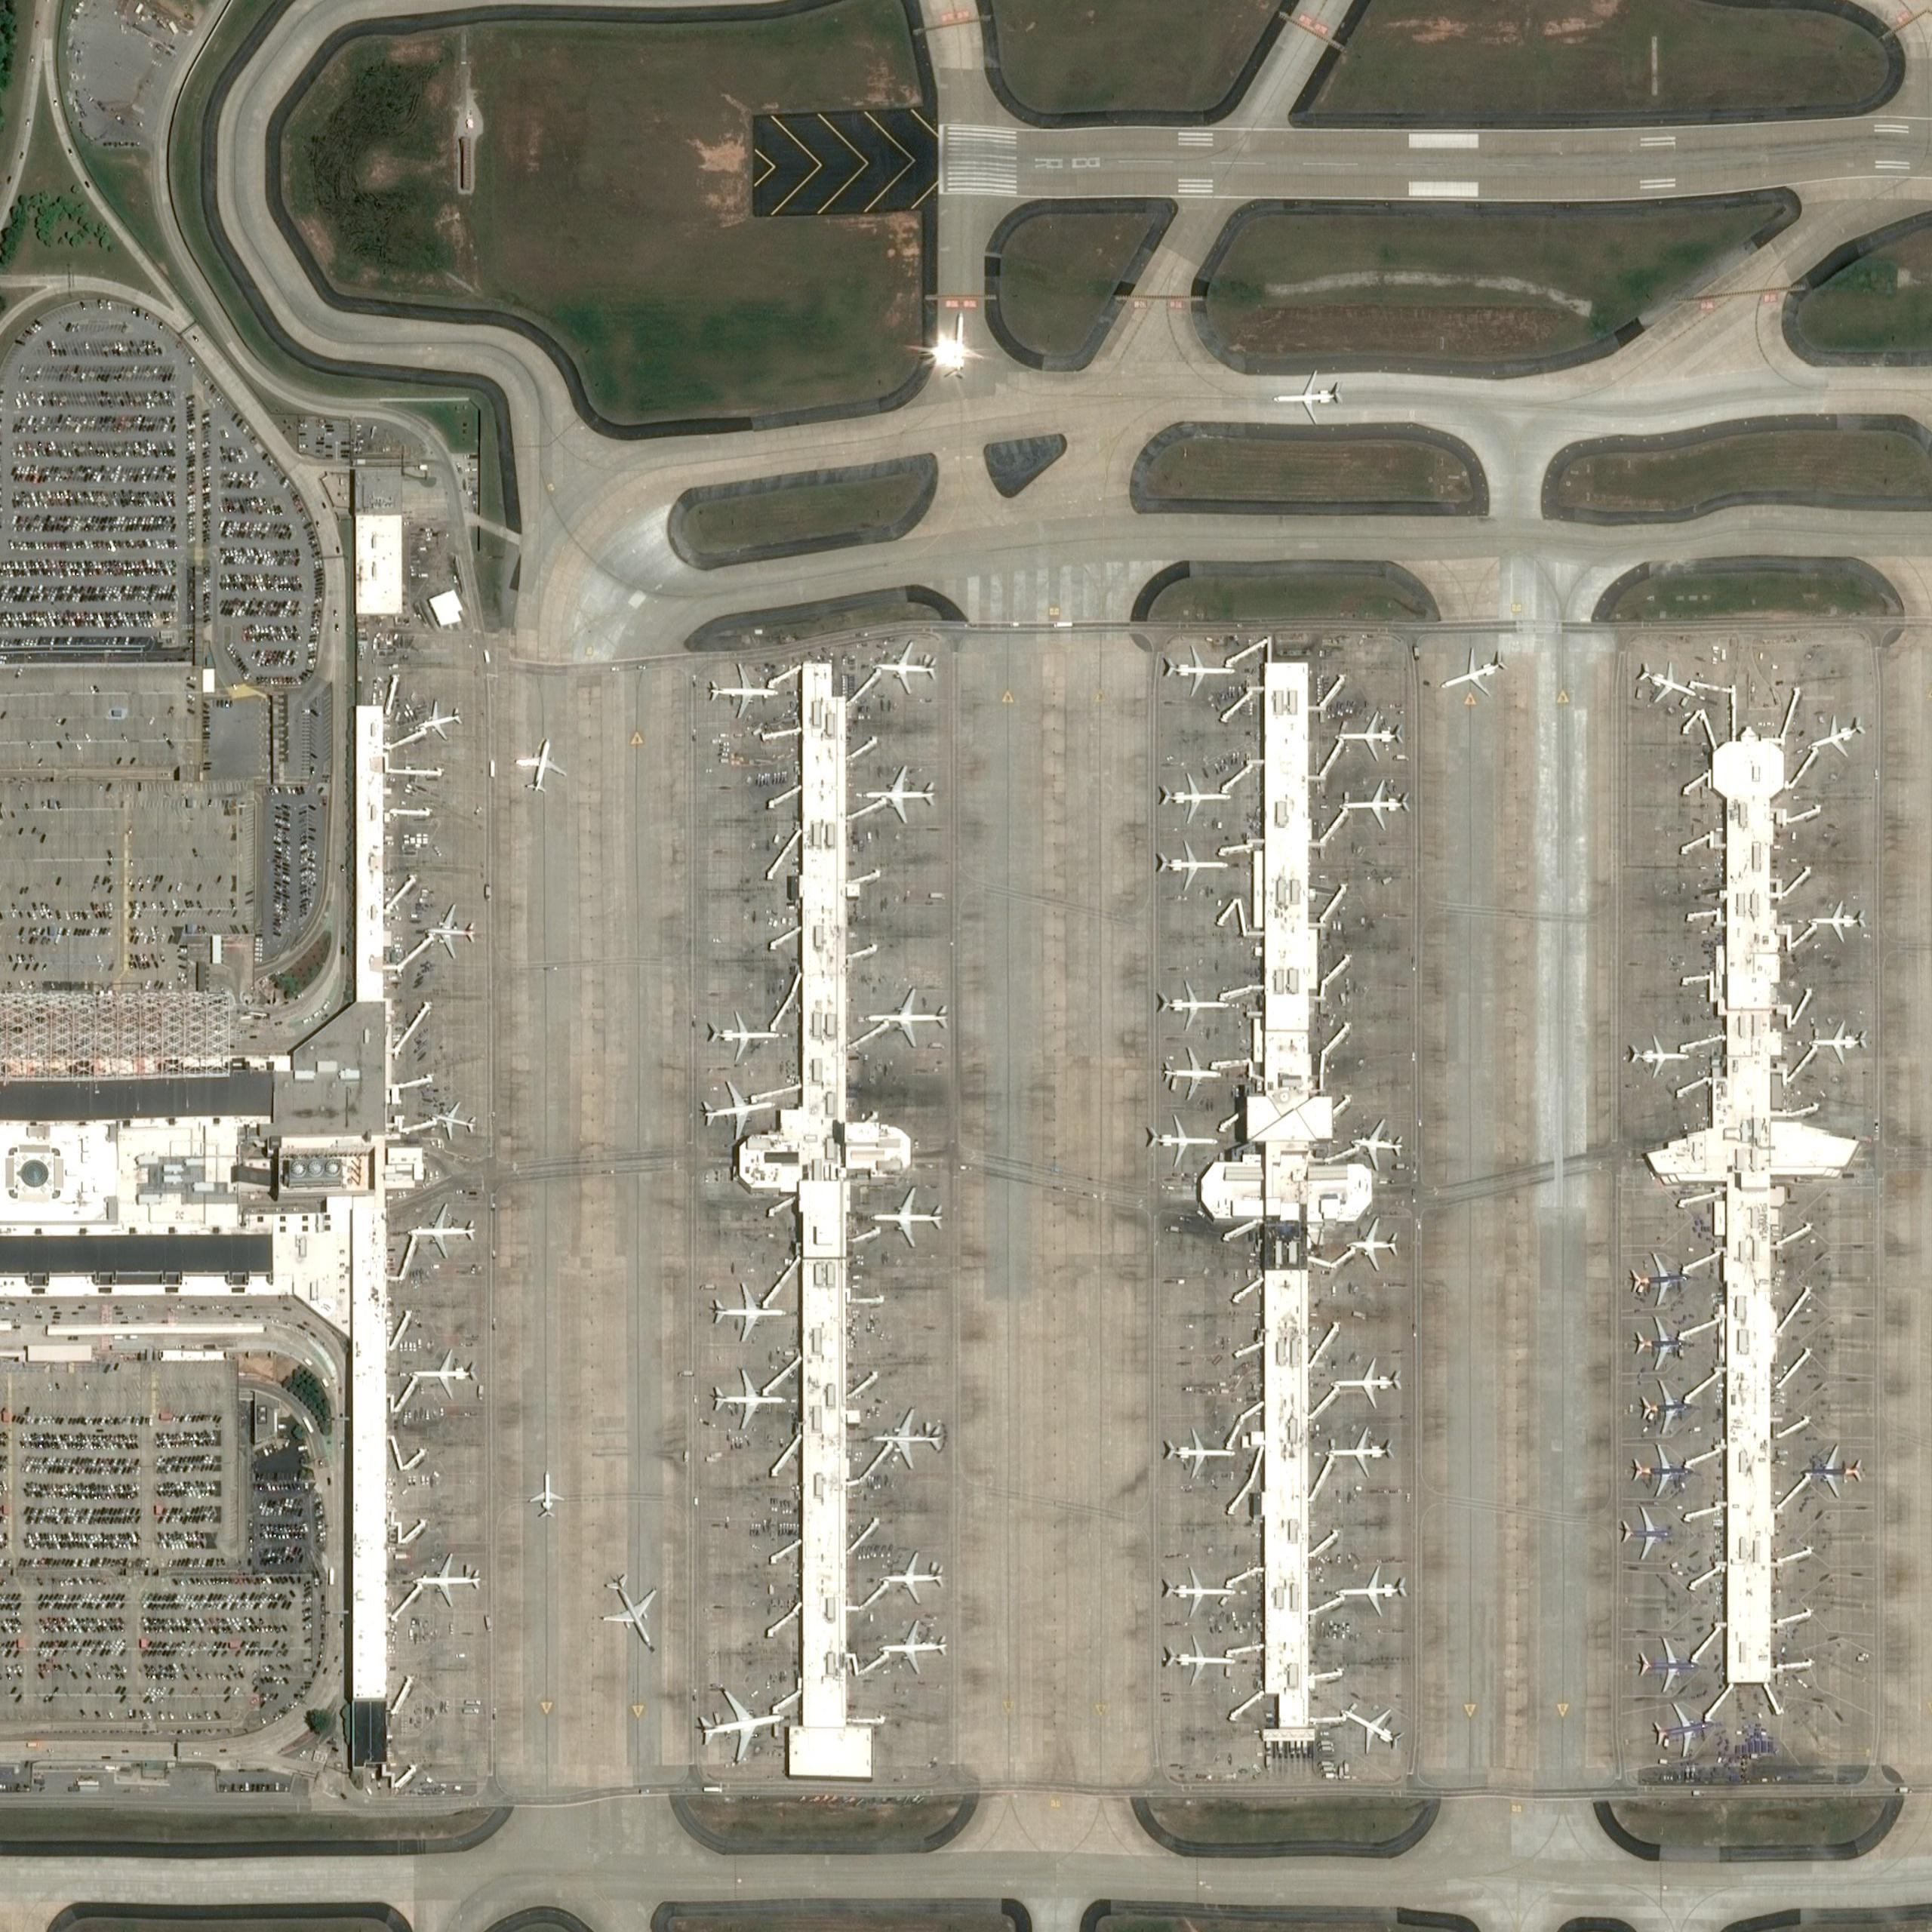

In [4]:
image_from_s3("images/4c9d2482-788c-4d68-a3d4-478b2367abce.jpg")